In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [5]:
data=pd.read_csv("winequalityN.csv")
data.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
data.shape

(6497, 13)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6487.0,7.216579,1.296750,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6489.0,0.339691,0.164649,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6494.0,0.318722,0.145265,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6495.0,5.444326,4.758125,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6495.0,0.056042,0.035036,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6488.0,3.218395,0.160748,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6493.0,0.531215,0.148814,0.22000,0.43000,0.51000,0.60000,2.00000


<Axes: xlabel='quality', ylabel='count'>

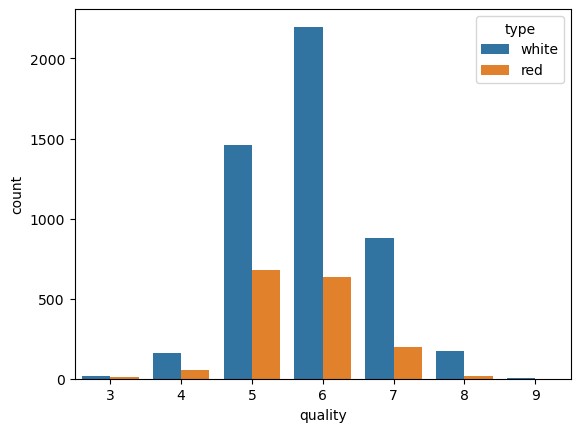

In [9]:
sns.countplot(data=data,x=data["quality"],hue="type")

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

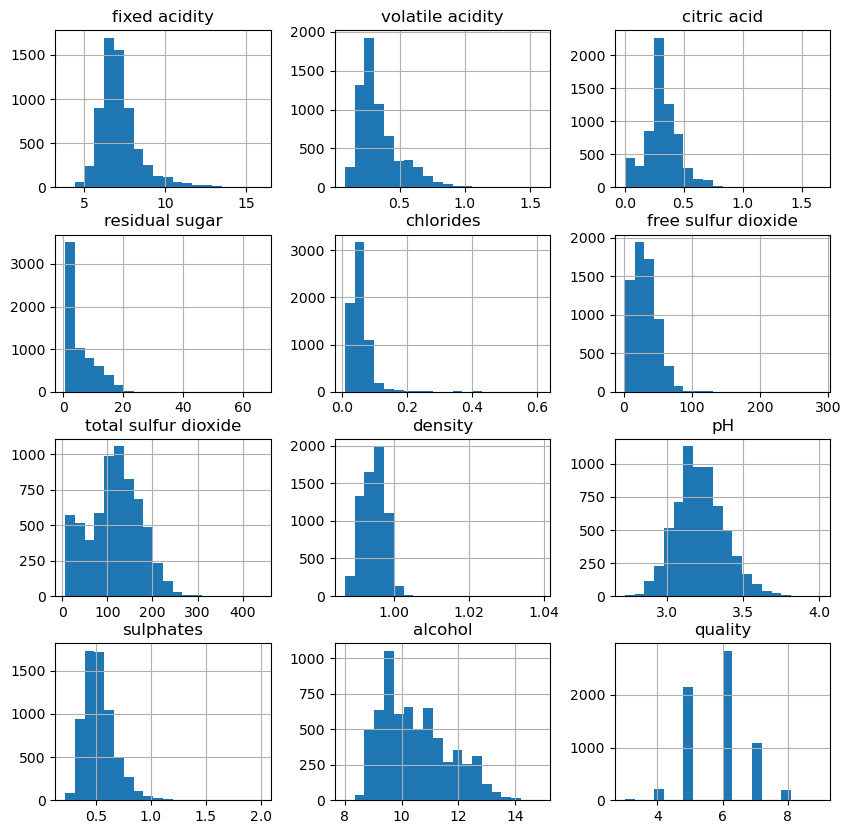

In [10]:
data.hist(bins=20,figsize=(10,10))

In [11]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
data['type']=encoder.fit_transform(data['type'])

<Axes: >

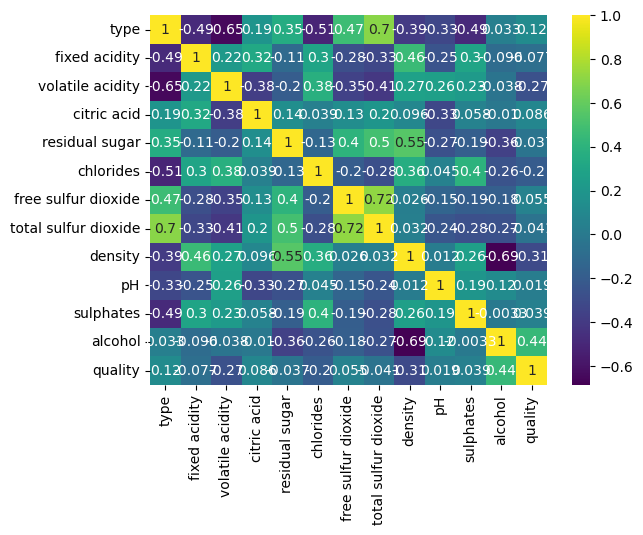

In [12]:
sns.heatmap(data.corr(),annot=True,cmap='viridis')

In [17]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X=sc.fit_transform(data)

In [18]:
from sklearn.utils import resample
minority_classes=data[data['quality'].isin([3,4,8,9])]
majority_classes=data[~data['quality'].isin([3,4,8,9])]
minority_unsampled=resample(minority_classes,replace=True,n_samples=len(majority_classes),random_state=42)
balances_data=pd.concat([majority_classes,minority_unsampled])

In [19]:
from sklearn.model_selection import train_test_split
X_balanced=balances_data.drop('quality',axis=1)
Y_balanced=balances_data['quality']
X_train,X_test,Y_train,Y_test=train_test_split(X_balanced,Y_balanced,test_size=0.2,random_state=42)


In [20]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=42)
dt_model=dt.fit(X_train,Y_train)
y_pred=dt.predict(X_test)

In [21]:
from sklearn.metrics import classification_report,accuracy_score
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           3       0.86      0.99      0.92        81
           4       0.92      0.99      0.95       586
           5       0.65      0.58      0.61       433
           6       0.63      0.62      0.63       566
           7       0.61      0.48      0.54       223
           8       0.92      1.00      0.96       521
           9       1.00      1.00      1.00        12

    accuracy                           0.79      2422
   macro avg       0.80      0.81      0.80      2422
weighted avg       0.77      0.79      0.78      2422



In [22]:
y_train_pred=dt.predict(X_train)
train_accuracy=accuracy_score(Y_train,y_train_pred)
print(train_accuracy)

0.9496076001652209


In [23]:
y_test_pred=dt.predict(X_test)
test_accuracy=accuracy_score(Y_test,y_test_pred)
print(test_accuracy)

0.786952931461602


[Text(0.6044870601225059, 0.984375, 'x[11] <= 11.617\ngini = 0.798\nsamples = 9684\nvalue = [323.0, 2333.0, 1705.0, 2270.0, 856.0, 2135.0, 62.0]'),
 Text(0.3167824949492229, 0.953125, 'x[2] <= 0.267\ngini = 0.777\nsamples = 7253\nvalue = [280, 2150, 1646, 1837, 481, 846, 13]'),
 Text(0.09705672555588218, 0.921875, 'x[11] <= 8.95\ngini = 0.783\nsamples = 2813\nvalue = [114.0, 371.0, 431.0, 917.0, 318.0, 662.0, 0.0]'),
 Text(0.009815807540059304, 0.890625, 'x[5] <= 0.053\ngini = 0.583\nsamples = 311\nvalue = [6.0, 9.0, 42.0, 45.0, 19.0, 190.0, 0.0]'),
 Text(0.00299148420268474, 0.859375, 'x[7] <= 130.5\ngini = 0.732\nsamples = 93\nvalue = [6.0, 9.0, 36.0, 27.0, 13.0, 2.0, 0.0]'),
 Text(0.00149574210134237, 0.828125, 'x[4] <= 13.45\ngini = 0.219\nsamples = 16\nvalue = [0, 0, 2, 14, 0, 0, 0]'),
 Text(0.000747871050671185, 0.796875, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2, 0, 0, 0, 0]'),
 Text(0.002243613152013555, 0.796875, 'gini = 0.0\nsamples = 14\nvalue = [0, 0, 0, 14, 0, 0, 0]'),
 T

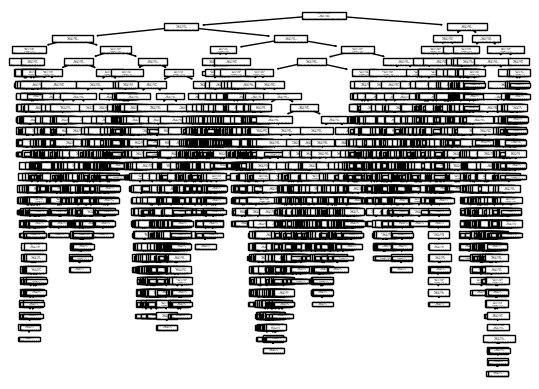

In [29]:
from sklearn import tree
tree.plot_tree(dt)


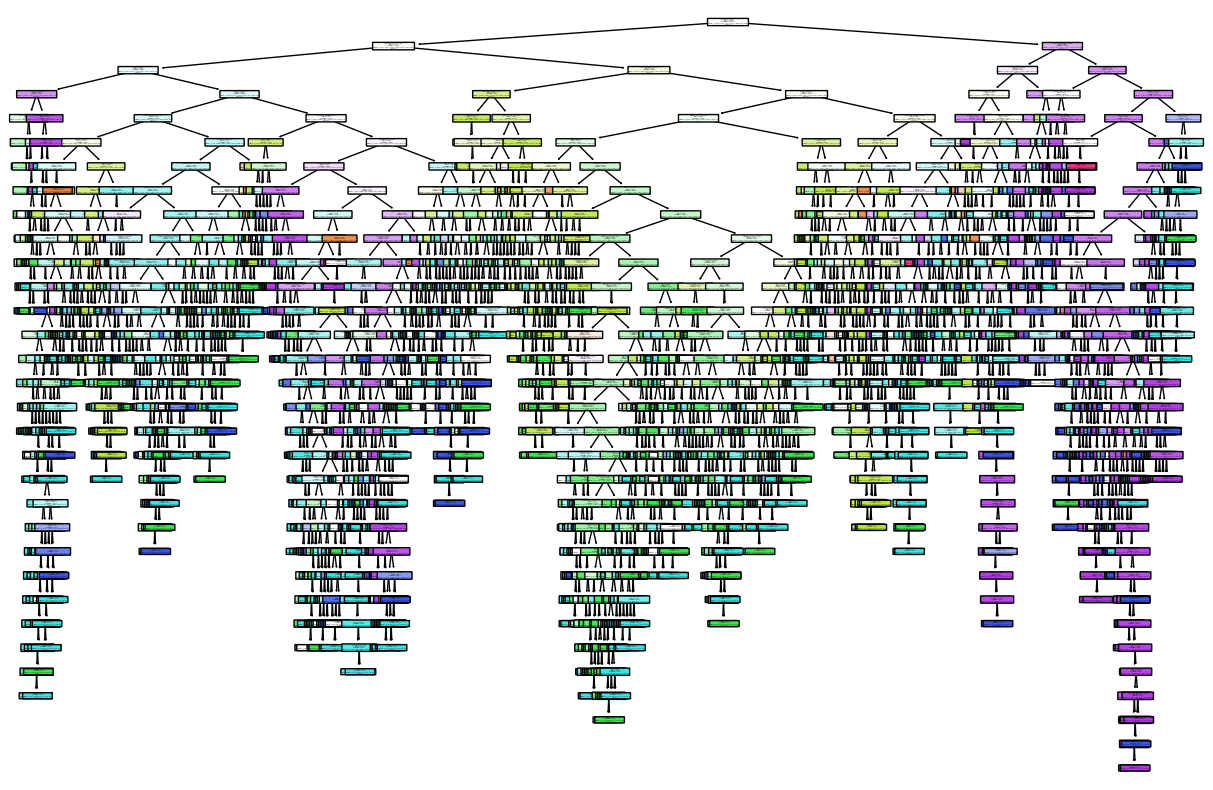

In [37]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
class_names=Y_balanced.unique().astype(str)
feature_names=list(data.columns)
class_mapping ={str(i): class_names for i,class_names in enumerate(class_names)}
y_as_strings=Y_balanced.astype(str).map(class_mapping )
plt.figure(figsize=(15,10))
plot_tree(dt,filled=True,feature_names=feature_names,class_names=list(class_mapping.values()),rounded=True,proportion=True)
plt.show()